In [38]:
## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation

In [3]:
%matplotlib inline 
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [4]:
image_train_dir = './data/person/train/'
image_test_dir = './data/person/test/'

## Create image training batches

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_generator = ImageDataGenerator(rescale=1./255)

In [16]:
train_data = train_generator.flow_from_directory(image_train_dir,
                                                 target_size=(256,256),
                                                 batch_size = 64,
                                                 class_mode='binary')
# 2 classes i.e, 2 directories with total 840 images

Found 55 images belonging to 2 classes.


In [17]:
train_data.n
train_data.class_indices

{'Bharat': 0, 'Sajive': 1}

In [18]:
train_data.image_shape

(256, 256, 3)

In [19]:
x_batch, y_batch = next(train_data)

In [20]:
y_batch

array([1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0.], dtype=float32)

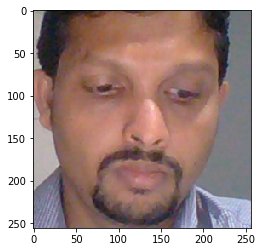

In [45]:
for i in range(40):
   plt.imshow(x_batch[i])

In [24]:
y_batch[3]

0.0

### Build a test data generator

In [25]:
test_generator = ImageDataGenerator(rescale=1./255)

In [26]:
test_data = test_generator.flow_from_directory(image_test_dir,
                                                 target_size=(256,256),
                                                 batch_size = 64,
                                                 class_mode='binary')
# 2 classes i.e, 2 directories with total 840 images

Found 21 images belonging to 2 classes.


In [27]:
test_data.n

21

In [28]:
test_data.class_indices

{'Bharat': 0, 'Sajive': 1}

## Build a CNN Model

In [29]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Activation, Flatten

In [30]:
model_v1 = Sequential()

#First convolution layer with 8 filter 
model_v1.add(Conv2D(filters=8, 
                    kernel_size=(3,3),
                    input_shape = train_data.image_shape))

model_v1.add(MaxPool2D(2,2))

#First convolution layer with 4 filter 

model_v1.add(Conv2D(filters=4, 
                    kernel_size=(3,3),
                    input_shape = train_data.image_shape))

model_v1.add(MaxPool2D(2,2))

#Flatten

# 1st layer of Dense and activation

model_v1.add(keras.layers.Flatten())
model_v1.add(Dense(64))
model_v1.add(Activation('relu'))

# 2nd layer of Dense and activation
model_v1.add(Dense(16))
model_v1.add(Activation('relu'))

# Add output layer 
model_v1.add(Dense(1))
model_v1.add(Activation('sigmoid'))



In [31]:
model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 4)       292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15376)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                984128    
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
__________

In [32]:
model_v1.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [33]:
%%time 
EPOCHS=10

# fit model
history = model_v1.fit_generator(
    train_data,
    steps_per_epoch = EPOCHS,
    epochs=10,
    validation_data = test_data,
    validation_steps=2
)

Epoch 1/10
10/10 [==============================] - 43s 4s/step - loss: 0.7400 - acc: 0.6564 - val_loss: 0.6114 - val_acc: 0.4762
Epoch 2/10
10/10 [==============================] - 42s 4s/step - loss: 0.3145 - acc: 0.9273 - val_loss: 0.1509 - val_acc: 1.0000
Epoch 3/10
10/10 [==============================] - 41s 4s/step - loss: 0.0357 - acc: 1.0000 - val_loss: 0.0265 - val_acc: 1.0000
Epoch 4/10
10/10 [==============================] - 39s 4s/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.0090 - val_acc: 1.0000
Epoch 5/10
10/10 [==============================] - 44s 4s/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 6/10
10/10 [==============================] - 44s 4s/step - loss: 5.8039e-04 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 7/10
10/10 [==============================] - 41s 4s/step - loss: 3.9037e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 8/10
10/10 [==============================] - 43s 4s/step - loss: 3.0072e-04

In [35]:
model_v1.save('faces_model.h3')

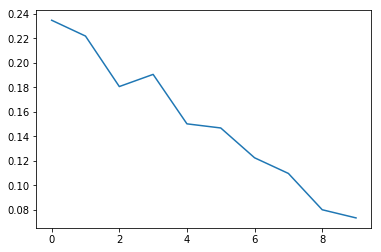

In [75]:
plt.plot(history.history['mean_squared_error'])

In [79]:
%%time 
EPOCHS=10
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau



callback_list = [TensorBoard('./logs'),
                EarlyStopping(monitor='val_loss',
                             patience=4),
                ModelCheckpoint(filepath='tomatoes_disease.h5', save_best_only=True),
                ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=2)]

# fit model
history = model_v1.fit_generator(
    train_data,
    steps_per_epoch = EPOCHS,
    epochs=2,
    callbacks = callback_list,
    validation_data = test_data,
    validation_steps=2
)

Epoch 1/2
10/10 [==============================] - 69s 7s/step - loss: 0.1652 - acc: 0.9375 - mean_squared_error: 0.0482 - val_loss: 0.3482 - val_acc: 0.8700 - val_mean_squared_error: 0.0994
Epoch 2/2
10/10 [==============================] - 54s 5s/step - loss: 0.0417 - acc: 0.9968 - mean_squared_error: 0.0060 - val_loss: 0.3327 - val_acc: 0.8900 - val_mean_squared_error: 0.0942
Wall time: 2min 4s


## Predict on TEST DATA


In [36]:
pred_y = model_v1.predict_generator(test_data)

In [37]:
pred_y.shape

(21, 1)